<font color='blue'> **001_Owl_SVD.ipynb** </font> <br>
https://www.linkedin.com/pulse/voc%C3%AA-j%C3%A1-abriu-uma-figura-diretamente-excel-rodrigo-m-grossi-jfxdf/

In [1]:
import numpy as np               ; import pandas as pd  ; from pathlib import Path   ; import scipy.linalg as la
import matplotlib.pyplot as plt  ; ref_data = Path("E:/15_REPOS/00_BETAMI/99_Ye_are_welcome/01_Algebra_Linear/001_MiniOwl_data")
from PIL import Image            ; sim_ws   = Path("E:/15_REPOS/00_BETAMI/99_Ye_are_welcome/01_Algebra_Linear/_RES") ; sim_ws.mkdir(exist_ok=True)
import os                        ; os.startfile(sim_ws / '01d.xlsx') 

(451, 451)

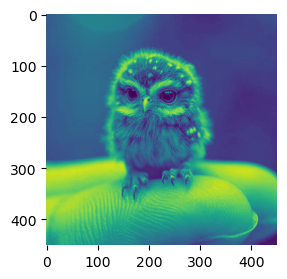

In [2]:
imagem = plt.imread(ref_data/"01a.pgm")  ; plt.figure(figsize = (10,3))  ; plt.imshow(imagem)  ; plt.box(False)  ; imagem.shape

<font color='blue'> **SVD Singular value decomposition** </font> 

In [3]:
im = Image.fromarray(imagem)    ; im.save    (sim_ws / "01b.jpeg")
imn = pd.DataFrame(imagem)      ; imn.to_csv (sim_ws / "01d.csv")                # then *.xlsx

In [4]:
U, S, Vh = la.svd(im) ; U.shape,  S.shape, Vh.shape

((451, 451), (451,), (451, 451))

In [5]:
Sd = np.diag(S)  ; R = U @ Sd @ Vh  ; R.shape  ; # Sd

In [6]:
np.set_printoptions(threshold=10, edgeitems=2, precision=0, suppress=True)   ; print(R)

[[ 69.  69. ...  61.  61.]
 [ 69.  69. ...  61.  61.]
 ...
 [135. 132. ...  13.  13.]
 [135. 133. ...  13.  13.]]


<font color='blue'> **Canonical Form** </font> 

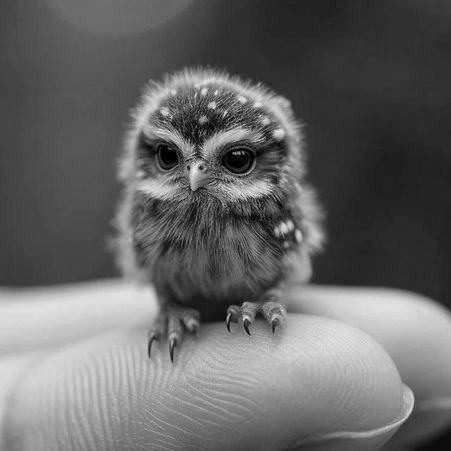

In [7]:
R = np.array(list(R), dtype='uint8')  ; im = Image.fromarray(R)  ; im.save(sim_ws / "01b.jpeg")  ; im

In [8]:
np.set_printoptions(threshold=10, edgeitems=60, precision=0, suppress=True)       ; S.shape  ;   # print(S)

In [9]:
Sd2 = np.diag(S)   ; np.set_printoptions(threshold=1, edgeitems=3, precision=0, suppress=True)   ; # Sd

<font color='blue'> **That would be all.** </font> 
<font color='red'> **BUT** </font> 
<font color='blue'> **you can choose how much information is worth considering** </font> 


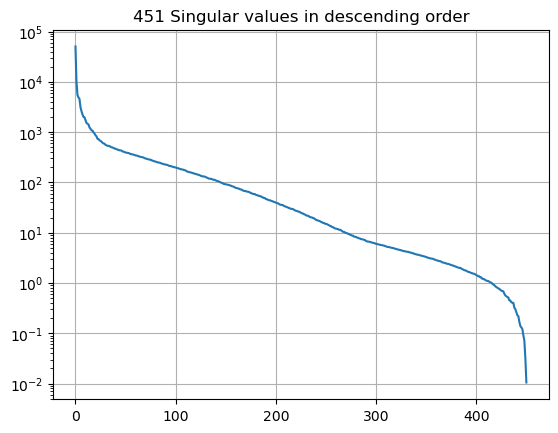

In [10]:
isp = pd.DataFrame(S) ; isp.to_csv(sim_ws / "So.csv")

plt.plot(S)  ; plt.grid()  ; plt.title('{0} Singular values in descending order'.format(len(S)));  plt.yscale('log');

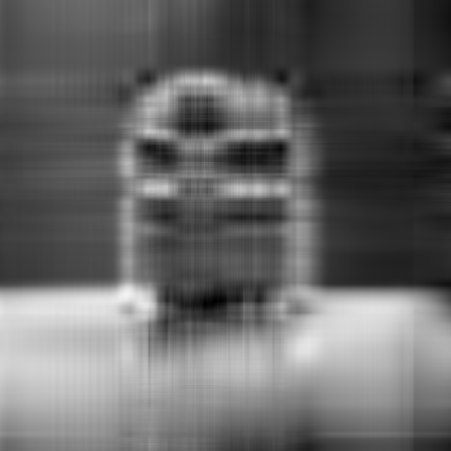

In [11]:
Sd2[:,-446:451]=0        ; Sd2   ; # yes, just 05 spectral componnets!
R2 = U @ Sd2 @ Vh                  # R2.shape
R3 = np.array(list(R2), dtype='uint8')  ; im2 = Image.fromarray(R3)  ; im2.save(sim_ws / "01c.jpeg")  ; im2

# __Q.E.D__ `     `  __. . .__   

In [12]:
L = np.array([[1,2,3], [4,5,6], [7,8,9]])       ; L       # ; L = np.arange(9).reshape((3,3))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [13]:
p = np.sum(L,axis=1).tolist()                    # sum of each column   ______ = a line vector
p2 = np.array(list(p), dtype='float32')          # a little transformation 
p3 = p2[:, np.newaxis]                           # ___________________________ = a column vector   
p3

array([[ 6.],
       [15.],
       [24.]], dtype=float32)

In [14]:
T = np.divide(L, p3)  ; pd.DataFrame(T)

,0,1,2
0,0.166667,0.333333,0.500
1,0.266667,0.333333,0.400
2,0.291667,0.333333,0.375


In [15]:
np.linalg.det(T)  

0.0

**This is an example of a symmetric matrix, thus, with a determinant that equals zero.** <font color='blue'> **..unfortunately, not symmetrical:**</font> 

In [16]:
Nt = T.transpose()     ; T2 = (T + Nt)/2   ; print('T2:') ; pd.DataFrame(Nt)

T2:


,0,1,2
0,0.166667,0.266667,0.291667
1,0.333333,0.333333,0.333333
2,0.500000,0.400000,0.375000


**Our foto works just fine, because it meets these requirements.**  <font color='blue'> **The use of complex numbers is highly recommended, because...** </font> 

In [17]:
H = np.random.default_rng()    ; a = H.normal(size=(3, 3)) + 1j*H.normal(size=(3, 3))  ; Comp = pd.DataFrame(a) ; Comp     

,0,1,2
0,-0.983135+0.460494j,0.483329-1.972386j,-0.518005-1.468617j
1,0.696685+0.943498j,-0.086920+1.184301j,-0.136715+0.993718j
2,-1.026450+1.726788j,-0.301565-1.543490j,-1.553898+0.088852j


**The same kind of rules applys for MODFLOW, for example:**  

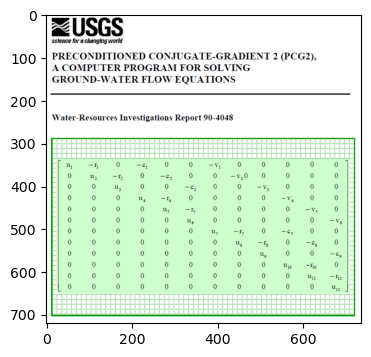

In [18]:
imagem = plt.imread(ref_data / "PCG2.png")   ; plt.figure(figsize = (8,4))  ; plt.imshow(imagem)

**Eigenvalue & Eigenvectors `          ` Autovalores & Autovetores**  

In [19]:
(a,b) = np.linalg.eig(L)  ; aD = np.diag(a)  ; eigenvalue = pd.DataFrame(aD)   ; eigenvalue                              

,0,1,2
0,16.116844,0.000000,0.000000e+00
1,0.000000,-1.116844,0.000000e+00
2,0.000000,0.000000,-3.478205e-16


In [20]:
eigenvectors = pd.DataFrame(b)     ; eigenvectors                              

,0,1,2
0,-0.231971,-0.785830,0.408248
1,-0.525322,-0.086751,-0.816497
2,-0.818673,0.612328,0.408248


### **Tks!**